Comenzamos cargando las bibliotecas solicitadas para este trabajo.
Cargaremos los datos de los tres archivos unidos en un DataFrame, y prepáralos
considerando las siguientes etapas:

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Tenemos 3 bases de datos, las cuales cargaremos cada una con un respectivo correlativo de dataframe, posteriromente los uniremos ya que previa revision notamos que tienen las mismas columnas.

In [ ]:
df1.columns = column_names[:df1.shape[1]]
df2.columns = column_names[:df2.shape[1]]
df3.columns = column_names[:df3.shape[1]]

In [ ]:
df_combinado = pd.concat([df1, df2, df3], ignore_index=True)

Con nuestro DF ya combinado ahora procederemos a revisarlo con lo habitual para un EDA (Exploratory Data Analysis)

In [ ]:
df_combinado.head()

,age,sex,cp,threstbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [ ]:
df_combinado.shape

(717, 14)

In [ ]:
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        717 non-null    float64
 1   sex        717 non-null    float64
 2   cp         717 non-null    float64
 3   threstbps  717 non-null    object 
 4   chol       717 non-null    object 
 5   fbs        717 non-null    object 
 6   restecg    717 non-null    object 
 7   thalach    717 non-null    object 
 8   exang      717 non-null    object 
 9   oldpeak    717 non-null    object 
 10  slope      717 non-null    object 
 11  ca         717 non-null    object 
 12  thal       717 non-null    object 
 13  num        717 non-null    int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 78.6+ KB


Ahora si, procederemos a hacer un analisis de la siguiente manera:

a. asigna a la variable objetivo num un cero cuando su valor es cero, y un 1 en
otro caso. Mostraremos la cantidad de valores ausentes por atributo. Serán procesados considerando los siguientes criterios:

Primero haremos una revision de NaN, y nos encontramos con el siguiente caso

In [ ]:
# Verificar la cantidad de valores nulos por columna antes de la operación
print("Valores nulos antes de la modificación:")
print(df_combinado.isna().sum())


Valores nulos antes de la modificación:
age          0
sex          0
cp           0
threstbps    0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
num          0
dtype: int64


A veces, los NaN estan hechos con otros caracteres que no necesareamente digan NaN, entonces debemos revisar que es lo que tienen ahi para corregir y rellenar

In [ ]:
df_combinado['thal'].value_counts()

,count
thal,
?,318
3.0,166
7.0,117
7,53
3,26
6,20
6.0,17


In [ ]:
df_combinado['ca'].value_counts()

,count
ca,
?,411
0.0,175
1.0,65
2.0,38
3.0,20
0,3
2,3
1,2


Luego de hacer una revision, efectivamente el DF no tiene NAN, sin embargo tiene otro simbolo '?', este es el que debemos reemplazaar ya que este es el NAN que tenian en este DF

In [ ]:
# Reemplazar cadenas vacías por NaN si es necesario
df_combinado.replace('?', np.nan, inplace=True)

# Verificar los valores nulos después de la modificación
print("Valores nulos después de reemplazar cadenas vacías por NaN:")
print(df_combinado.isna().sum())


Valores nulos después de reemplazar cadenas vacías por NaN:
age            0
sex            0
cp             0
threstbps      3
chol          23
fbs           82
restecg        2
thalach        2
exang          2
oldpeak        6
slope        206
ca           411
thal         318
num            0
dtype: int64


Ahora si se puede seguir avanzando, ya que logramos encontrar los NaN  en el DF

In [ ]:
# Paso 1: Asignar la variable objetivo `num` según la condición
df_combinado['num'] = df_combinado['num'].apply(lambda x: 0 if x == 0 else 1)

# Paso 2: Contar los valores ausentes por atributo
valores_ausentes = df_combinado.isna().sum()

# Mostrar la cantidad de valores ausentes por atributo
print("Valores ausentes por atributo:")
print(valores_ausentes)

Valores ausentes por atributo:
age            0
sex            0
cp             0
threstbps      3
chol          23
fbs           82
restecg        2
thalach        2
exang          2
oldpeak        6
slope        206
ca           411
thal         318
num            0
dtype: int64


i. si el atributo presenta un porcentaje de valores ausentes mayor a 25%,
entonces descartaremos ese atributo.


In [ ]:
# Paso 1: Calcular el porcentaje de valores ausentes por atributo
porcentaje_ausentes = (df_combinado.isna().sum() / df_combinado.shape[0]) * 100

# Mostrar el porcentaje de valores ausentes por atributo
print("Porcentaje de valores ausentes por atributo:")
print(porcentaje_ausentes)

# Paso 2: Eliminar los atributos con más del 25% de valores ausentes
atributos_a_descartar = porcentaje_ausentes[porcentaje_ausentes > 25].index
df_combinado = df_combinado.drop(columns=atributos_a_descartar)

# Verificar el DataFrame después de eliminar las columnas
print("\nDataFrame después de eliminar columnas con más del 25% de valores ausentes:")
print(df_combinado.head())

Porcentaje de valores ausentes por atributo:
age           0.000000
sex           0.000000
cp            0.000000
threstbps     0.418410
chol          3.207810
fbs          11.436541
restecg       0.278940
thalach       0.278940
exang         0.278940
oldpeak       0.836820
slope        28.730823
ca           57.322176
thal         44.351464
num           0.000000
dtype: float64

DataFrame después de eliminar columnas con más del 25% de valores ausentes:
    age  sex   cp threstbps   chol  fbs restecg thalach exang oldpeak  num
0  67.0  1.0  4.0     160.0  286.0  0.0     2.0   108.0   1.0     1.5    1
1  67.0  1.0  4.0     120.0  229.0  0.0     2.0   129.0   1.0     2.6    1
2  37.0  1.0  3.0     130.0  250.0  0.0     0.0   187.0   0.0     3.5    0
3  41.0  0.0  2.0     130.0  204.0  0.0     2.0   172.0   0.0     1.4    0
4  56.0  1.0  2.0     120.0  236.0  0.0     0.0   178.0   0.0     0.8    0


In [ ]:
df_combinado.shape

(717, 11)

In [ ]:
#Verificamos si la columna 'num' fue filtrada con las condiciones solicitadas
df_combinado['num'].value_counts()

,count
num,
1,359
0,358


ii. para los atributos con valores ausentes menores al 25% deberemos
rellenar con el valor promedio del atributo de acuerdo a la clase, es
decir, los valores ausentes para los cuales num=0 se deben rellenar
con el promedio de los valores presentes para los cuales num=0.

Lo que se da a entender con la siguiente formula:

In [ ]:
# Paso 1: Iterar sobre las columnas
for columna in df_combinado.columns:
    # Asegurarse de que la columna tenga valores numéricos y no sea 'num'
    if df_combinado[columna].isna().sum() > 0 and columna != 'num':
        # Intentar convertir la columna a tipo numérico
        df_combinado[columna] = pd.to_numeric(df_combinado[columna], errors='coerce')

        # Verificar si aún tiene valores no numéricos (NaN) después de la conversión
        if df_combinado[columna].isna().sum() > 0:
            print(f"Advertencia: la columna {columna} contiene valores no numéricos")

        # Calcular el promedio por clase (num=0 y num=1)
        promedio_num_0 = df_combinado[df_combinado['num'] == 0][columna].mean()
        promedio_num_1 = df_combinado[df_combinado['num'] == 1][columna].mean()

        # Redondear los promedios si lo deseas
        promedio_num_0 = round(promedio_num_0)
        promedio_num_1 = round(promedio_num_1)

        # Rellenar los valores ausentes para num=0 con el promedio calculado
        df_combinado.loc[(df_combinado['num'] == 0) & (df_combinado[columna].isna()), columna] = promedio_num_0

        # Rellenar los valores ausentes para num=1 con el promedio calculado
        df_combinado.loc[(df_combinado['num'] == 1) & (df_combinado[columna].isna()), columna] = promedio_num_1

# Verificar el DataFrame después de rellenar los valores ausentes
print("\nDataFrame después de rellenar los valores ausentes:")
print(df_combinado.head())


Advertencia: la columna threstbps contiene valores no numéricos
Advertencia: la columna chol contiene valores no numéricos
Advertencia: la columna fbs contiene valores no numéricos
Advertencia: la columna restecg contiene valores no numéricos
Advertencia: la columna thalach contiene valores no numéricos
Advertencia: la columna exang contiene valores no numéricos
Advertencia: la columna oldpeak contiene valores no numéricos

DataFrame después de rellenar los valores ausentes:
    age  sex   cp  threstbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  67.0  1.0  4.0      160.0  286.0  0.0      2.0    108.0    1.0      1.5   
1  67.0  1.0  4.0      120.0  229.0  0.0      2.0    129.0    1.0      2.6   
2  37.0  1.0  3.0      130.0  250.0  0.0      0.0    187.0    0.0      3.5   
3  41.0  0.0  2.0      130.0  204.0  0.0      2.0    172.0    0.0      1.4   
4  56.0  1.0  2.0      120.0  236.0  0.0      0.0    178.0    0.0      0.8   

   num  
0    1  
1    1  
2    0  
3    0  
4    0

iii. Para las variables categóricas, los valores a asignar (promedio) deben
ser aproximados al valor entero más cercano.

In [ ]:
# Paso 1: Iterar sobre las columnas
for columna in df_combinado.columns:
    # Asegurarse de que la columna tenga valores ausentes y no sea 'num'
    if df_combinado[columna].isna().sum() > 0 and columna != 'num':

        # Convertir la columna a tipo numérico si es categórica (usando 'coerce' para manejar valores no numéricos)
        df_combinado[columna] = pd.to_numeric(df_combinado[columna], errors='coerce')

        # Calcular el promedio por clase (num=0 y num=1)
        promedio_num_0 = df_combinado[df_combinado['num'] == 0][columna].mean()
        promedio_num_1 = df_combinado[df_combinado['num'] == 1][columna].mean()

        # Redondear el promedio al valor entero más cercano
        promedio_num_0 = round(promedio_num_0)
        promedio_num_1 = round(promedio_num_1)

        # Rellenar los valores ausentes para num=0 con el promedio redondeado
        df_combinado.loc[(df_combinado['num'] == 0) & (df_combinado[columna].isna()), columna] = promedio_num_0

        # Rellenar los valores ausentes para num=1 con el promedio redondeado
        df_combinado.loc[(df_combinado['num'] == 1) & (df_combinado[columna].isna()), columna] = promedio_num_1

# Verificar el DataFrame después de rellenar los valores ausentes
print("\nDataFrame después de rellenar los valores ausentes:")
print(df_combinado.head())



DataFrame después de rellenar los valores ausentes:
    age  sex   cp  threstbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  67.0  1.0  4.0      160.0  286.0  0.0      2.0    108.0    1.0      1.5   
1  67.0  1.0  4.0      120.0  229.0  0.0      2.0    129.0    1.0      2.6   
2  37.0  1.0  3.0      130.0  250.0  0.0      0.0    187.0    0.0      3.5   
3  41.0  0.0  2.0      130.0  204.0  0.0      2.0    172.0    0.0      1.4   
4  56.0  1.0  2.0      120.0  236.0  0.0      0.0    178.0    0.0      0.8   

   num  
0    1  
1    1  
2    0  
3    0  
4    0  


b. Construye variables dummies para las variables discretas con tres o más
categorías.

Vamos a hacer la correlacion primero, ya que despues nos va a quedar una matriz gigantesca, porque abriremos cada columna que no sea categorica, entonces de esta manera tenemos una buena referencia de como esta nuestro grafico, en la creacion de dummies no es necesario ver la matriz ya que esto es "un trabajo interior", nos importan mas los resultados.

In [ ]:
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        717 non-null    float64
 1   sex        717 non-null    float64
 2   cp         717 non-null    float64
 3   threstbps  717 non-null    float64
 4   chol       717 non-null    float64
 5   fbs        717 non-null    float64
 6   restecg    717 non-null    float64
 7   thalach    717 non-null    float64
 8   exang      717 non-null    float64
 9   oldpeak    717 non-null    float64
 10  num        717 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 61.7 KB


In [ ]:
#Primero, veremos que columnas tienen mas de 3 o mas variables, las que tengan menos, se quedan afuera para la creacion de Dummies.
df_combinado.nunique()

,0
age,48
sex,2
cp,4
threstbps,57
chol,201
fbs,2
restecg,3
thalach,114
exang,2
oldpeak,53


In [ ]:
df_combinado.shape

c. Realizaremos un análisis descriptivo por variable visualizando histogramas y
gráficos de barra según corresponda.
Construiremos una matriz de correlacion con un heatmap, para las variables continuas.

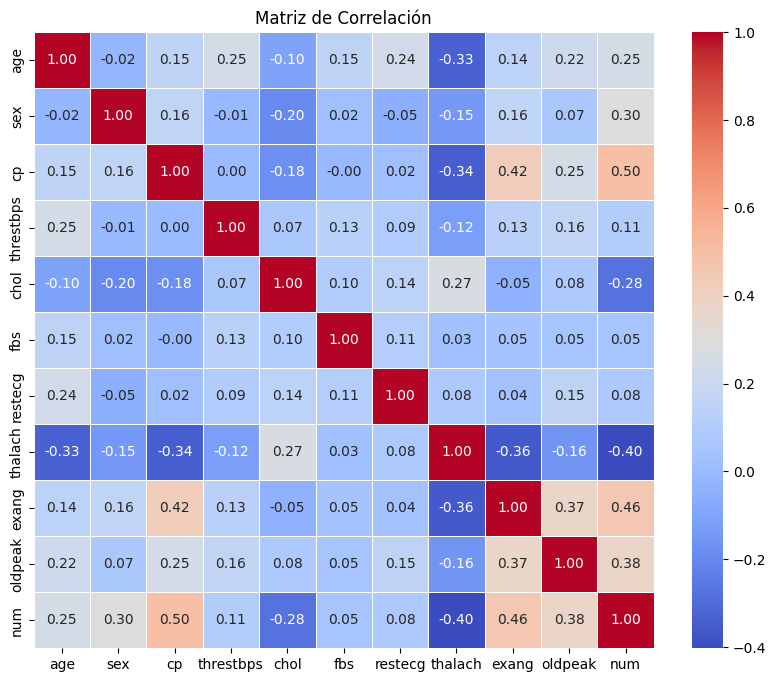

In [ ]:
# Calcular la matriz de correlación
corr = df_combinado.corr()

# Heatmap de la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


In [ ]:
# 1. Descripción general de las variables
print(df_combinado.describe())  # Estadísticas descriptivas de las variables numéricas

              age         sex         cp   threstbps        chol         fbs  \
count  717.000000  717.000000  717.00000  717.000000  717.000000  717.000000   
mean    51.934449    0.737796    3.18689  131.843794  205.705718    0.096234   
std      9.129876    0.440140    0.94762   18.471952  107.563291    0.295118   
min     29.000000    0.000000    1.00000   80.000000    0.000000    0.000000   
25%     45.000000    0.000000    2.00000  120.000000  183.000000    0.000000   
50%     53.000000    1.000000    4.00000  130.000000  229.000000    0.000000   
75%     58.000000    1.000000    4.00000  140.000000  269.000000    0.000000   
max     77.000000    1.000000    4.00000  200.000000  603.000000    1.000000   

          restecg     thalach       exang     oldpeak         num  
count  717.000000  717.000000  717.000000  717.000000  717.000000  
mean     0.566248  140.509066    0.338912    0.790516    0.500697  
std      0.830716   25.609803    0.473670    1.062985    0.500349  
min    

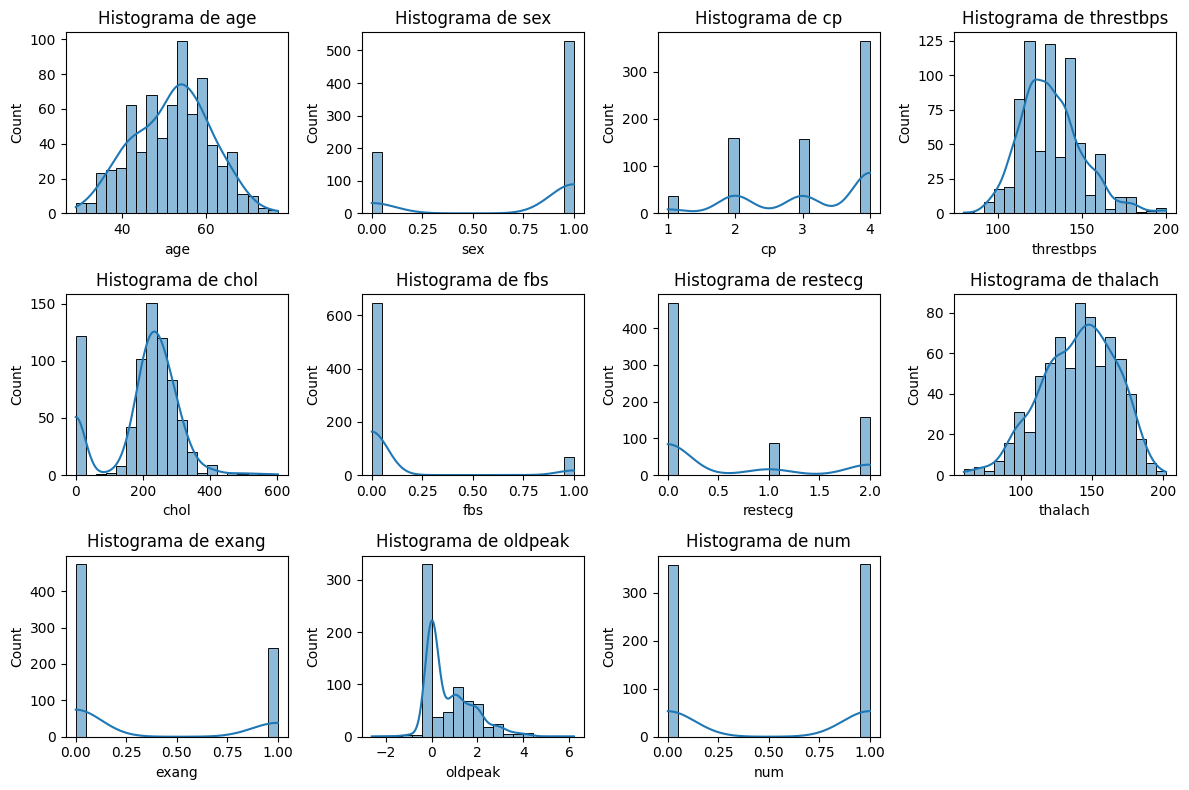

In [ ]:
# 2. Histograma de variables numéricas
numeric_columns = df_combinado.select_dtypes(include='number').columns

plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)  # Puedes cambiar el 3x4 para ajustarlo según el número de columnas
    sns.histplot(df_combinado[column], kde=True, bins=20)
    plt.title(f'Histograma de {column}')
plt.tight_layout()
plt.show()

In [ ]:
#Para hacer lo siguiente necesitamos cambiar el tipo de columna categorica que estaba numerica, despues las devolveremos, este cambio solo es para ver los graficos pertinentes
df_combinado['sex'] = df_combinado['sex'].astype('category')
df_combinado['cp'] = df_combinado['cp'].astype('category')
df_combinado['restecg'] = df_combinado['restecg'].astype('category')
df_combinado['fbs'] = df_combinado['fbs'].astype('category')
df_combinado['exang'] = df_combinado['exang'].astype('category')

In [ ]:
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        717 non-null    float64 
 1   sex        717 non-null    category
 2   cp         717 non-null    category
 3   threstbps  717 non-null    float64 
 4   chol       717 non-null    float64 
 5   fbs        717 non-null    category
 6   restecg    717 non-null    category
 7   thalach    717 non-null    float64 
 8   exang      717 non-null    category
 9   oldpeak    717 non-null    float64 
 10  num        717 non-null    int64   
dtypes: category(5), float64(5), int64(1)
memory usage: 37.9 KB


Index(['sex', 'cp', 'fbs', 'restecg', 'exang'], dtype='object')


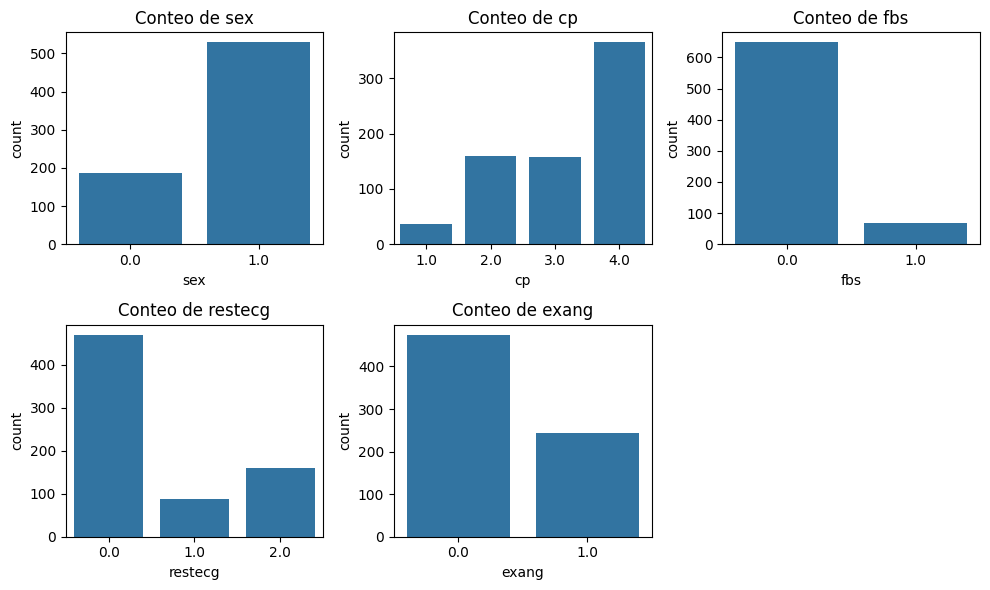

In [ ]:
categorical_columns = df_combinado.select_dtypes(include='category').columns
print(categorical_columns)  # Esto debería mostrar las columnas categóricas
n_cols = 3  # Número de columnas en el subplot
n_rows = int(np.ceil(len(categorical_columns) / n_cols))  # Número de filas necesarias para acomodar las columnas

plt.figure(figsize=(10, 6))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=df_combinado[column])
    plt.title(f'Conteo de {column}')
plt.tight_layout()
plt.show()

In [ ]:
#Una vez hecho, devolvamolos a su normalidad para la posterior creacion de dummies

df_combinado['sex'] = df_combinado['sex'].astype('float64')
df_combinado['cp'] = df_combinado['cp'].astype('float64')
df_combinado['restecg'] = df_combinado['restecg'].astype('float64')
df_combinado['fbs'] = df_combinado['fbs'].astype('float64')
df_combinado['exang'] = df_combinado['exang'].astype('float64')

In [ ]:
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        717 non-null    float64
 1   sex        717 non-null    float64
 2   cp         717 non-null    float64
 3   threstbps  717 non-null    float64
 4   chol       717 non-null    float64
 5   fbs        717 non-null    float64
 6   restecg    717 non-null    float64
 7   thalach    717 non-null    float64
 8   exang      717 non-null    float64
 9   oldpeak    717 non-null    float64
 10  num        717 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 61.7 KB


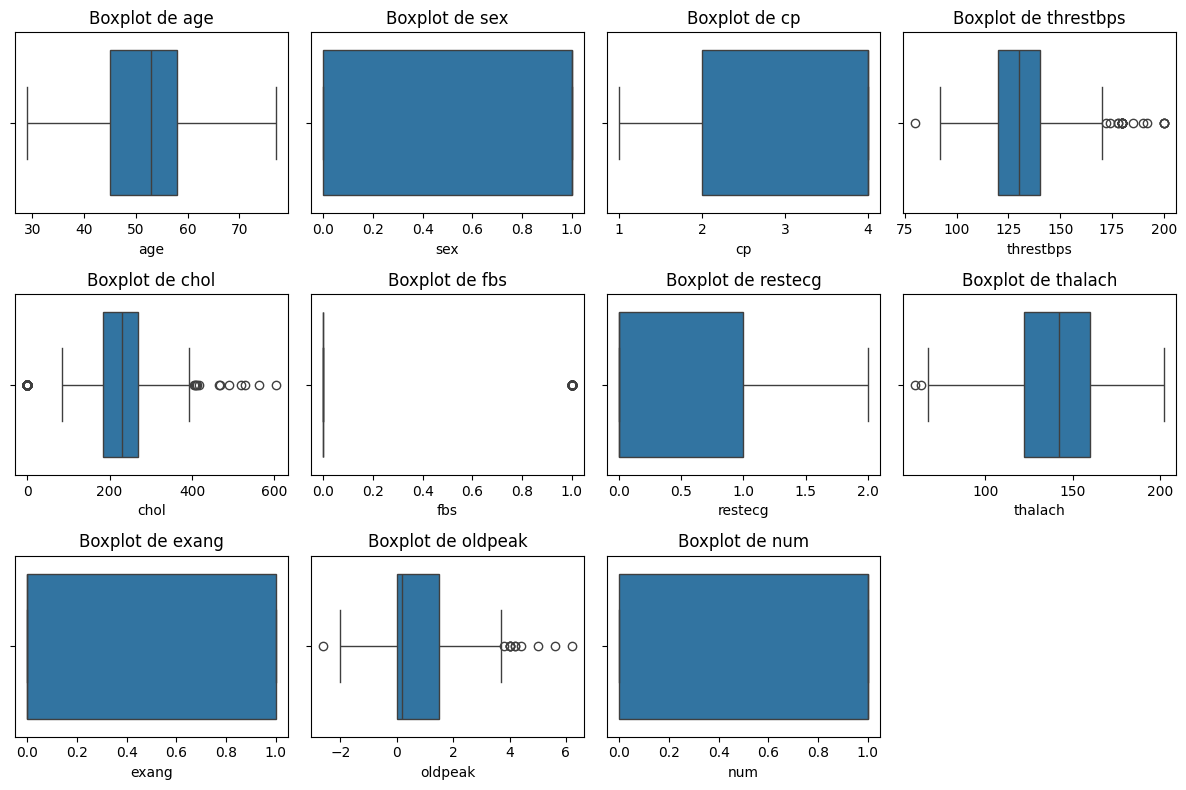

In [ ]:
# 4. Boxplots para ver valores atípicos (opcional)
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)  # Ajusta el número de filas y columnas
    sns.boxplot(x=df_combinado[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()



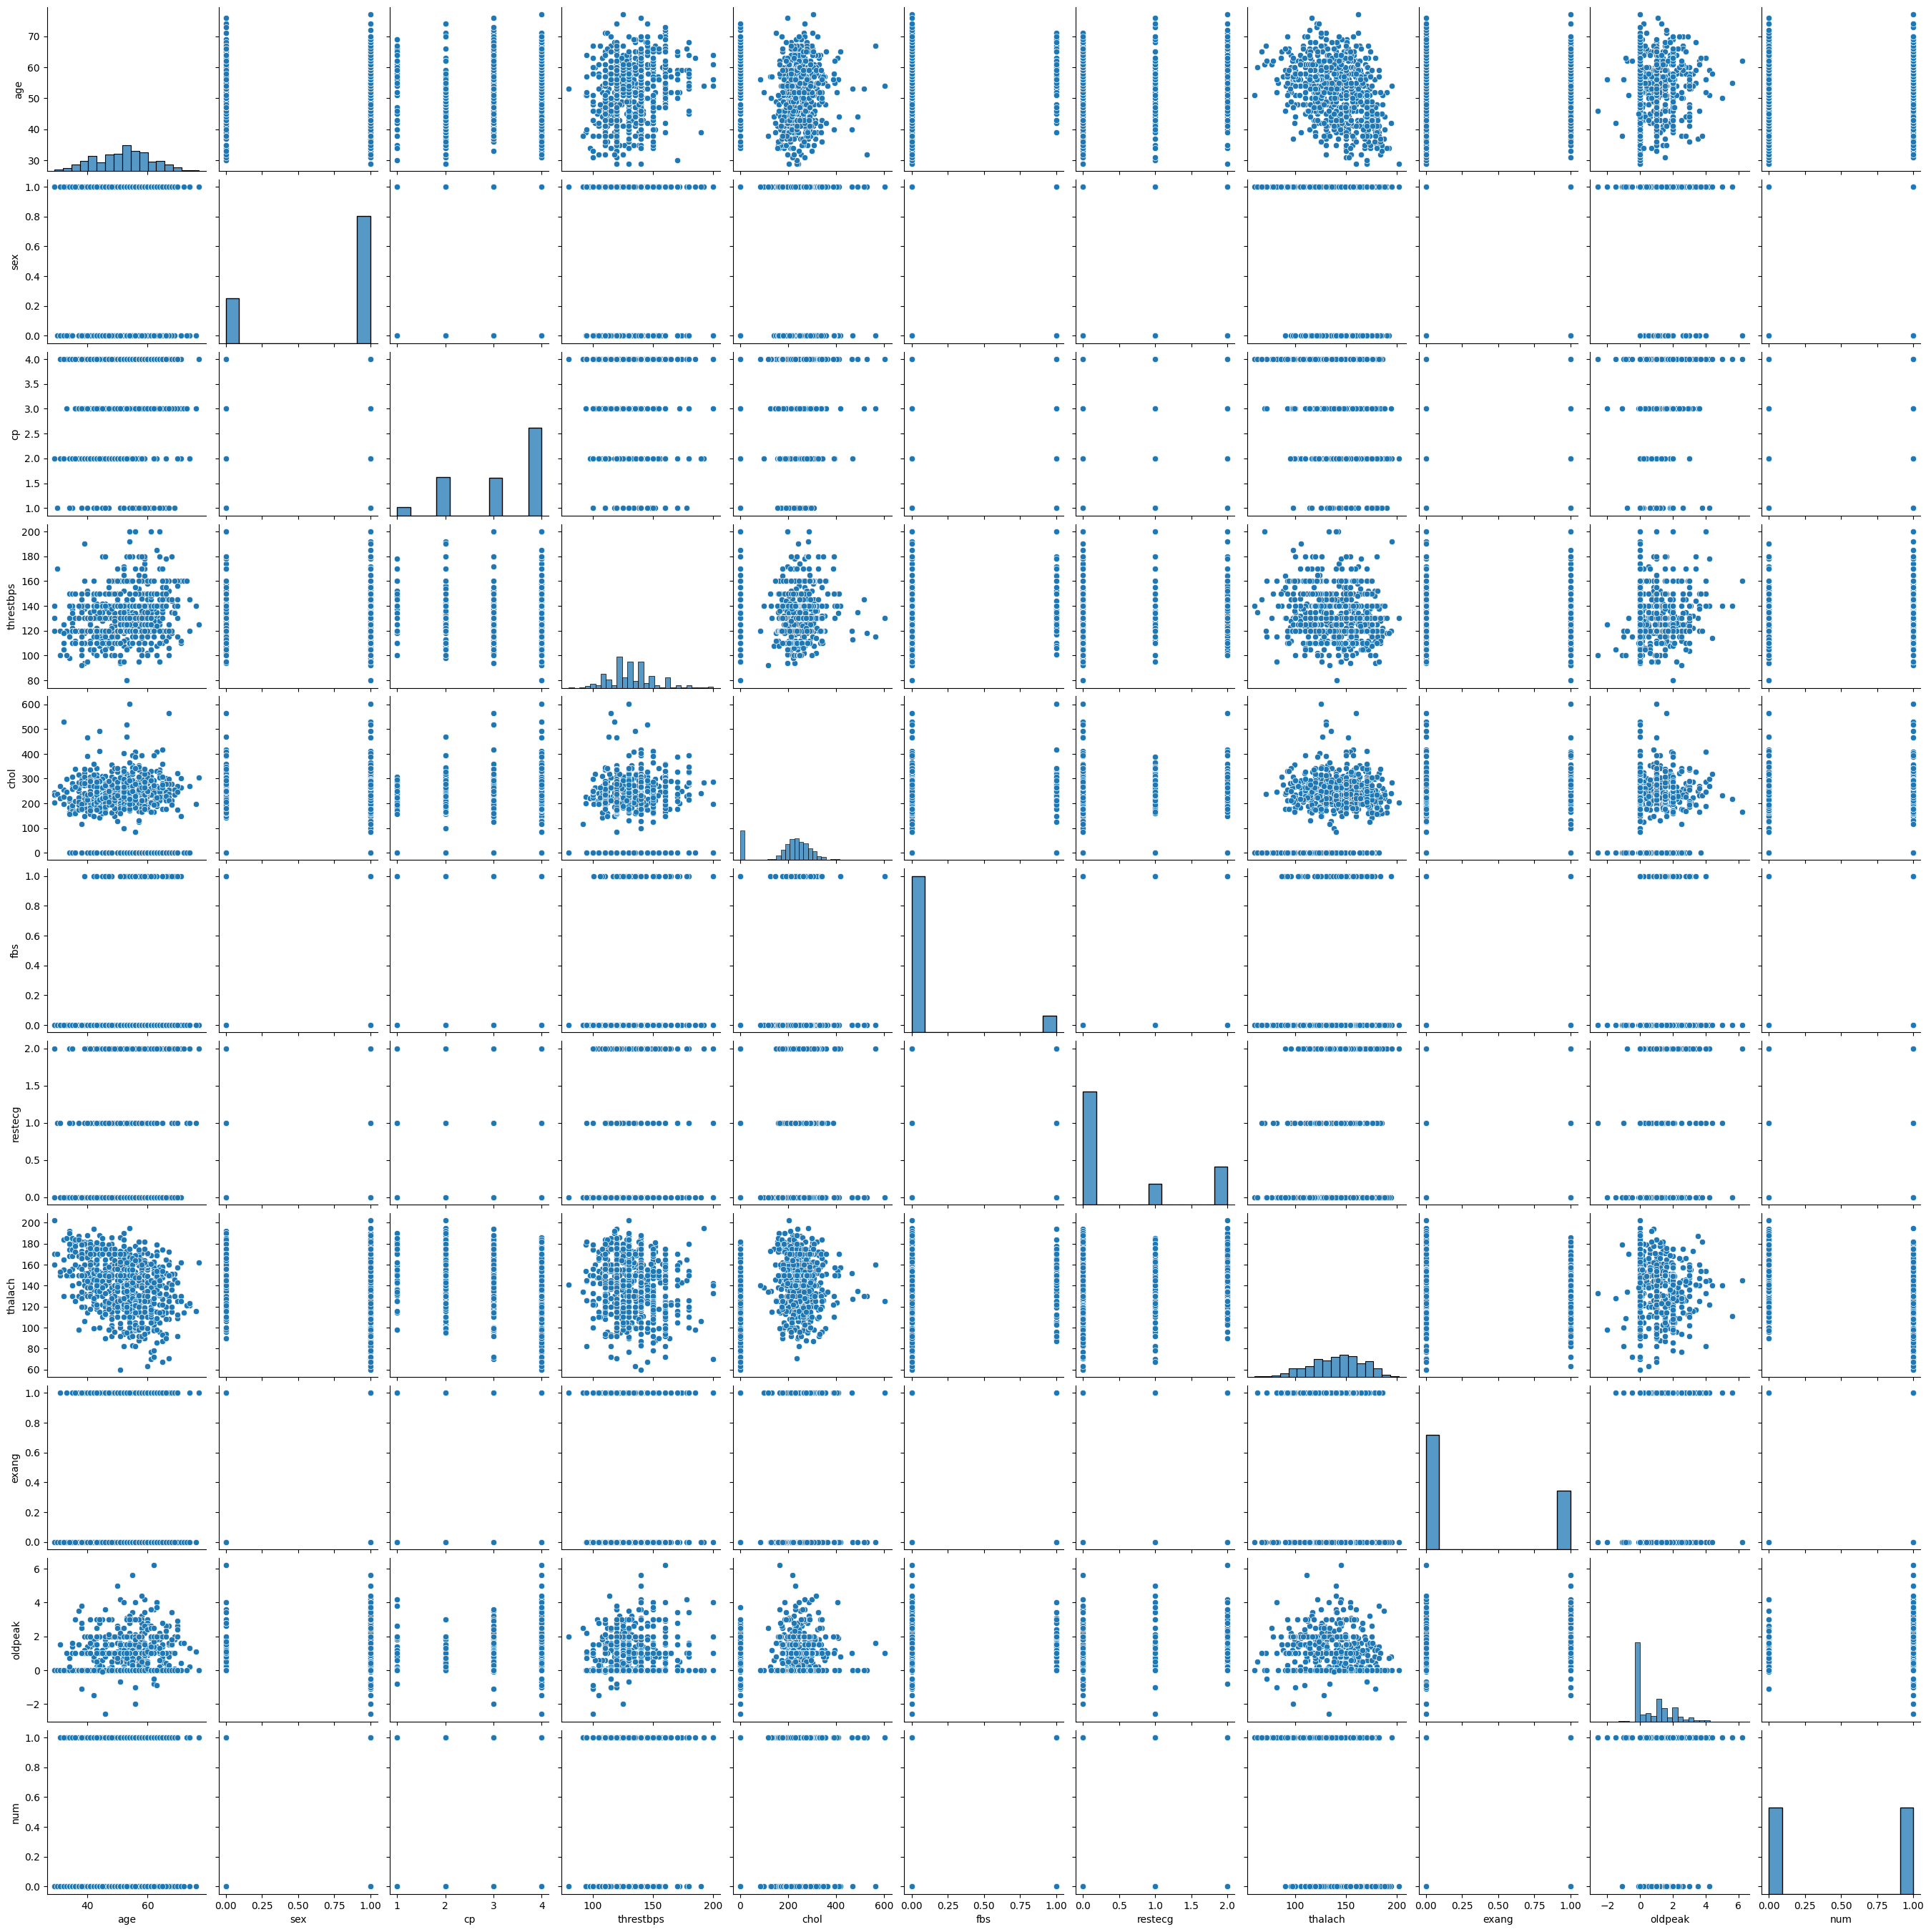

In [ ]:
# 5. Pairplot (opcional, solo si tienes un par de variables numéricas que te gustaría comparar)
sns.pairplot(df_combinado[numeric_columns])
plt.show()

Con este apartado tenemos la finalizacion de nuestro EDA, los resultados que se pueden obtener son infinitos ya que depende de donde queramos dar especificar para atender un punto, yo haré notar los siguientes:

*   Hay datos Outliers, pero no veo ninguno que haga una diferencia considerable, por lo mismo prefiero dejarlos
*   La columna CP es la que tiene mayor correlacion, sin embargo es una de tipo moderado (0,50)
*   Muchos de los casos de barras demuestran que nuestro DF esta centrico, es optimo para hacer un analisis, no hay barras muy separadas como lo muestra la linea de tendencia en cada uno de los graficos
*   Hay graficos que son simples de interpretar, pero es una manera muy grata de tomar la informacion en comparacion a solo mirar numeros, recomiendo hacer estos codigos a la mayoria de los casos cuando tenemos un EDA.
*   Si habria que quitar Outliers consideraria a 'Thresbps', 'Chol' y 'Oldpeak'



In [ ]:
# Crear las variables dummies solo para las columnas con 3 o más categorías
df_combinado = pd.get_dummies(df_combinado, columns=['age', 'cp','threstbps','chol','restecg','thalach','oldpeak'], drop_first=True)

# Verificar las primeras filas para ver cómo se ven las nuevas columnas dummies
print(df_combinado.head())


   sex  fbs  exang  num  age_30.0  age_31.0  age_32.0  age_33.0  age_34.0  \
0  1.0  0.0    1.0    1     False     False     False     False     False   
1  1.0  0.0    1.0    1     False     False     False     False     False   
2  1.0  0.0    0.0    0     False     False     False     False     False   
3  0.0  0.0    0.0    0     False     False     False     False     False   
4  1.0  0.0    0.0    0     False     False     False     False     False   

   age_35.0  ...  oldpeak_3.5  oldpeak_3.6  oldpeak_3.7  oldpeak_3.8  \
0     False  ...        False        False        False        False   
1     False  ...        False        False        False        False   
2     False  ...         True        False        False        False   
3     False  ...        False        False        False        False   
4     False  ...        False        False        False        False   

   oldpeak_4.0  oldpeak_4.2  oldpeak_4.4  oldpeak_5.0  oldpeak_5.6  \
0        False        False       

In [ ]:
# Convertir las columnas booleanas (True/False) en 1/0
df_combinado[df_combinado.select_dtypes(include=[bool]).columns] = df_combinado.select_dtypes(include=[bool]).astype(int)

# Verificar las primeras filas para asegurarse de que la conversión se realizó correctamente
print(df_combinado.head())


   sex  fbs  exang  num  age_30.0  age_31.0  age_32.0  age_33.0  age_34.0  \
0  1.0  0.0    1.0    1         0         0         0         0         0   
1  1.0  0.0    1.0    1         0         0         0         0         0   
2  1.0  0.0    0.0    0         0         0         0         0         0   
3  0.0  0.0    0.0    0         0         0         0         0         0   
4  1.0  0.0    0.0    0         0         0         0         0         0   

   age_35.0  ...  oldpeak_3.5  oldpeak_3.6  oldpeak_3.7  oldpeak_3.8  \
0         0  ...            0            0            0            0   
1         0  ...            0            0            0            0   
2         0  ...            1            0            0            0   
3         0  ...            0            0            0            0   
4         0  ...            0            0            0            0   

   oldpeak_4.0  oldpeak_4.2  oldpeak_4.4  oldpeak_5.0  oldpeak_5.6  \
0            0            0       

In [ ]:
df_combinado.shape

(717, 477)

Ahora tenemos un DF gigantesco con 717 filas y 477 columnas, listas para hacerles los modelos

Procediendo a la modelacion del DF esta será de la siguiente manera:

Divide la muestra en entrenamiento y test (33%), y con ello:

*   a. modelo de ensamble secuencial AdaBoost
*   b. modelo de ensamble secuencial Gradient Boosting
*   c. modelo de ensamble secuencial XGBoosting

Para cada uno, utilizaremos hiper parámetros por defecto y mostraremos su desempeño usando las métricas adecuadas.

In [ ]:
#Vamos a hacer una copia y asi trabajar tranquilos en todos los modelos a seguir

df_for_model = df_combinado.copy()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# X son las características (todas las columnas excepto 'num')
# y es el target (la columna 'num' que queremos predecir)
X = df_for_model.drop('num', axis=1)
y = df_for_model['num']

# Dividir en entrenamiento (67%) y test (33%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Inicializamos el modelo AdaBoost
ada_boost = AdaBoostClassifier(random_state=42)

# Entrenamos el modelo
ada_boost.fit(X_train, y_train)

# Realizamos las predicciones
y_pred_ada = ada_boost.predict(X_test)

# Métricas de desempeño
print("Desempeño de AdaBoost:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada):.4f}")
print(classification_report(y_test, y_pred_ada))


Desempeño de AdaBoost:
Accuracy: 0.8481
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       114
           1       0.88      0.82      0.85       123

    accuracy                           0.85       237
   macro avg       0.85      0.85      0.85       237
weighted avg       0.85      0.85      0.85       237



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Inicializamos el modelo Gradient Boosting
grad_boost = GradientBoostingClassifier(random_state=42)

# Entrenamos el modelo
grad_boost.fit(X_train, y_train)

# Realizamos las predicciones
y_pred_grad = grad_boost.predict(X_test)

# Métricas de desempeño
print("Desempeño de Gradient Boosting:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_grad):.4f}")
print(classification_report(y_test, y_pred_grad))


Desempeño de Gradient Boosting:
Accuracy: 0.8101
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       114
           1       0.88      0.74      0.80       123

    accuracy                           0.81       237
   macro avg       0.82      0.81      0.81       237
weighted avg       0.82      0.81      0.81       237



In [ ]:
import xgboost as xgb

# Inicializamos el modelo XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# Entrenamos el modelo
xgb_model.fit(X_train, y_train)

# Realizamos las predicciones
y_pred_xgb = xgb_model.predict(X_test)

# Métricas de desempeño
print("Desempeño de XGBoost:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(classification_report(y_test, y_pred_xgb))


Desempeño de XGBoost:
Accuracy: 0.8143
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       114
           1       0.84      0.79      0.82       123

    accuracy                           0.81       237
   macro avg       0.82      0.82      0.81       237
weighted avg       0.82      0.81      0.81       237



In [ ]:
#Vamos a comparar y elegir:

print("Desempeño de XGBoost:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("Desempeño de Gradient Boosting:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_grad):.4f}")
print("Desempeño de AdaBoost:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada):.4f}")

Desempeño de XGBoost:
Accuracy: 0.8143
Desempeño de Gradient Boosting:
Accuracy: 0.8101
Desempeño de AdaBoost:
Accuracy: 0.8481


Realizaremos una búsqueda del hiper parámetro para el modelo que resulte tener mejor desempeño (utilizaremos f1-score para determinarlo). Los valores a buscar para la grilla son:

*   n_estimators: 20 a 200 con 15 valores
*   learning_rate: 0.004 a 1.0 con 40 valores
*   sub_sample: 0.1 a 1.0 con 18 valores

Mostraremos los mejores hiper parámetros encontrados y entrenaremos un modelo con estos, presentando sus métricas.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer, f1_score

# Inicializamos el modelo AdaBoost
ada_boost = AdaBoostClassifier(random_state=42)

# Definimos el rango de hiperparámetros para la búsqueda
param_grid_ada = {
    'n_estimators': [i for i in range(20, 201, 15)],  # de 20 a 200 con 15 valores
    'learning_rate': [i * 0.025 for i in range(1, 41)]  # de 0.004 a 1.0 con 40 valores
}

# Realizamos la búsqueda con GridSearchCV
grid_search_ada = GridSearchCV(estimator=ada_boost, param_grid=param_grid_ada, scoring=f1_scorer, cv=3, n_jobs=-1)

# Entrenamos el modelo con la búsqueda de hiperparámetros
grid_search_ada.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores hiperparámetros encontrados para AdaBoost:")
print(grid_search_ada.best_params_)

# Entrenar el modelo con los mejores hiperparámetros
best_ada = grid_search_ada.best_estimator_

# Realizamos las predicciones
y_pred_best_ada = best_ada.predict(X_test)

# Métricas de desempeño
print("Desempeño del modelo con los mejores hiperparámetros de AdaBoost:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_ada):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_best_ada):.4f}")
print(classification_report(y_test, y_pred_best_ada))

Mejores hiperparámetros encontrados para AdaBoost:
{'learning_rate': 0.45, 'n_estimators': 20}
Desempeño del modelo con los mejores hiperparámetros de AdaBoost:
Accuracy: 0.8354
F1-score: 0.8368
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       114
           1       0.86      0.81      0.84       123

    accuracy                           0.84       237
   macro avg       0.84      0.84      0.84       237
weighted avg       0.84      0.84      0.84       237



Elaboraremos un gráfico con las curvas ROC para cada modelo entrenado, y a partir de ello, trabajaremos con uno en particular.

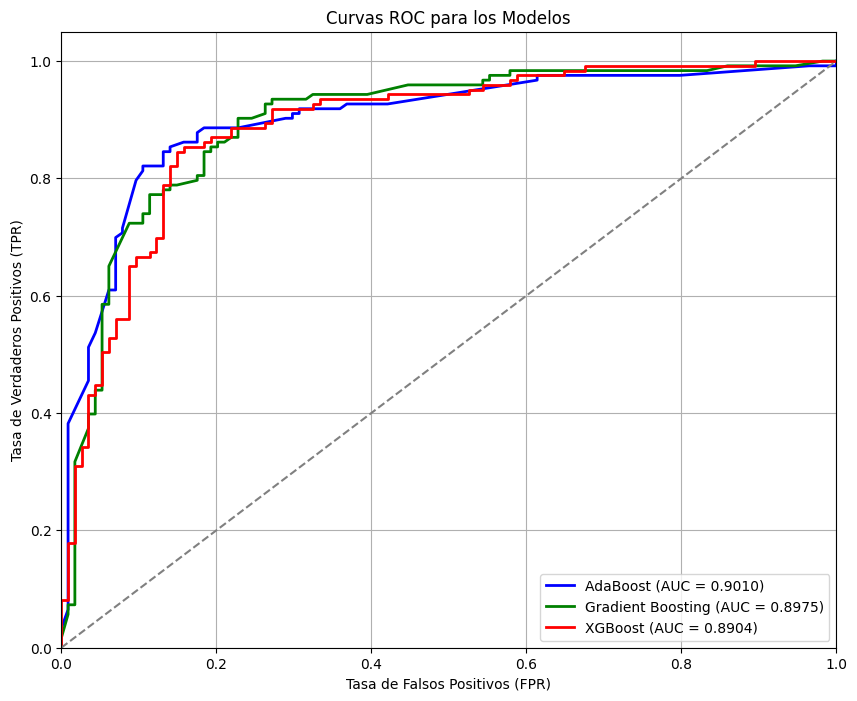

In [ ]:
from sklearn.metrics import roc_curve, auc

# Función para trazar las curvas ROC
def plot_roc_curve(models, X_test, y_test, model_names):
    plt.figure(figsize=(10, 8))

    # Colores y estilos de línea para cada modelo
    colors = ['blue', 'green', 'red']

    for i, model in enumerate(models):
        # Obtener las probabilidades para la clase positiva
        y_prob = model.predict_proba(X_test)[:, 1]

        # Calcular la curva ROC
        fpr, tpr, _ = roc_curve(y_test, y_prob)

        # Calcular el AUC
        roc_auc = auc(fpr, tpr)

        # Trazar la curva ROC
        plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'{model_names[i]} (AUC = {roc_auc:.4f})')

    # Configuración de la gráfica
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal (modelo aleatorio)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title('Curvas ROC para los Modelos')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Entrenar nuevamente los modelos (si no los has entrenado en el código anterior)
# Ya que asumimos que tienes los modelos entrenados: ada_boost, grad_boost, xgb_model

# Llamamos a la función para graficar las curvas ROC
plot_roc_curve(
    models=[ada_boost, grad_boost, xgb_model],
    X_test=X_test,
    y_test=y_test,
    model_names=['AdaBoost', 'Gradient Boosting', 'XGBoost']
)


Todos los modelos están dando muy buenos resultados, con AUC superiores a 0.89, estan calculando de forma precisa. Sin embargo, AdaBoost es ligeramente superior en rendimiento, seguido de cerca por Gradient Boosting y, en tercer lugar, XGBoost. si nos vamos en lo simple, adaboost seria la mejor, pero podemos considera cualquiera de los 3 porque estan sobre la media que considera un muy buen numero, que es un 89%

Muestra las variables por nivel de importancia para el mejor modelo, luego de la
búsqueda de hiper parámetros.

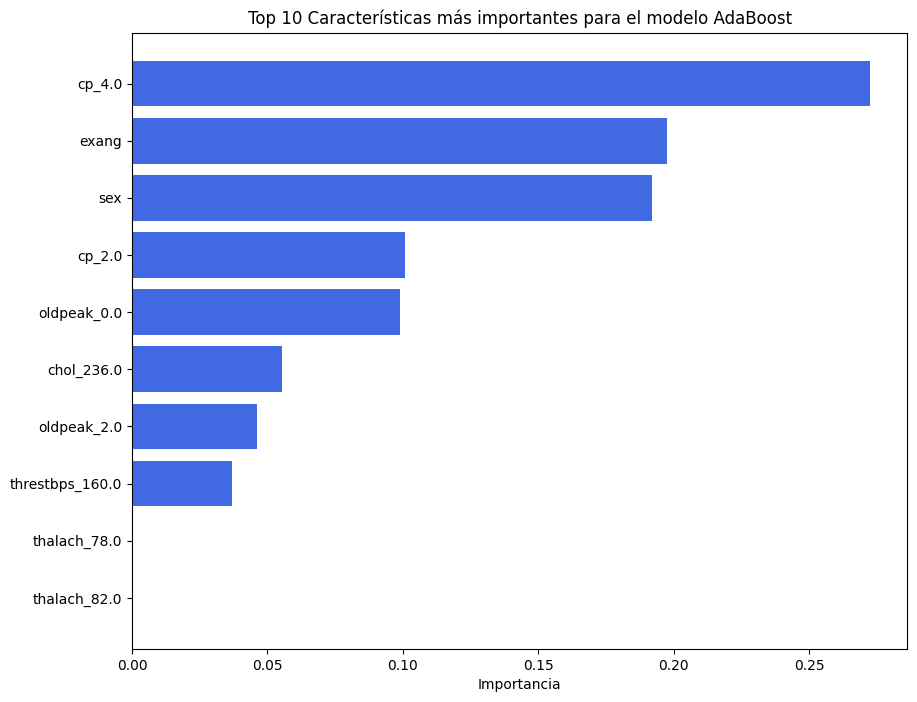

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Obtener las importancias de las características para el mejor modelo
importances = best_ada.feature_importances_  # Para AdaBoost
# Para GradientBoosting, puedes usar: best_gb.feature_importances_
# Para XGBoost, puedes usar: best_xgb.feature_importances_

# Crear un DataFrame con las importancias
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Ordenar las características por importancia
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Graficar las 10 características más importantes
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='royalblue')
plt.xlabel('Importancia')
plt.title('Top 10 Características más importantes para el modelo AdaBoost')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar las más importantes en la parte superior
plt.show()


Gracias a lo hecho mediante los dummies, y la EDA correctamente aplicada, ahora podemos saber cual era la variable o las variables que tienen mayor ingerencia en si la persona tiene o no problemas cardiacos.
Con estas variables en consideracion podemos tomar desiciones mas importantes, como priorizar a este tipo de pacientes, el tipo 4 por sobre otros, analizar que edad tienen todos para calcular cuando es mas probable y asi en adelante.